In [5]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file_path = './data/Aug24-Assignmen1-Dataset1.xlsx'
train_df = pd.read_excel(file_path)

train_df.columns = ['label','text']

file_path = './data/Aug24-Assignment1-Validation-Dataset1.xlsx'
val_df = pd.read_excel(file_path)

val_df.columns = ['label','text']

for i in range(len(train_df)):
    if (isinstance(train_df['text'][i], float)):
        print(i)
print(type(train_df['text'][0]))

train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
val_df['text_len'] = val_df['text'].apply(lambda x: len(x.split()))

125
<class 'str'>


In [7]:
sst2_data = load_dataset("sst2")

train_sst_df = pd.DataFrame(sst2_data['train'])
val_sst_df = pd.DataFrame(sst2_data['validation'])
test_sst_df = pd.read_csv('./data/SST2_TestData.csv')

In [8]:
train_sst_df.columns = ['idx','text','label']
val_sst_df.columns = ['idx','text','label']
test_sst_df.columns = ['label','text']


train_sst_df['text_len'] = train_sst_df['text'].apply(lambda x: len(x.split()))
val_sst_df['text_len'] = val_sst_df['text'].apply(lambda x: len(x.split()))
test_sst_df['text_len'] = test_sst_df['text'].apply(lambda x: len(x.split()))

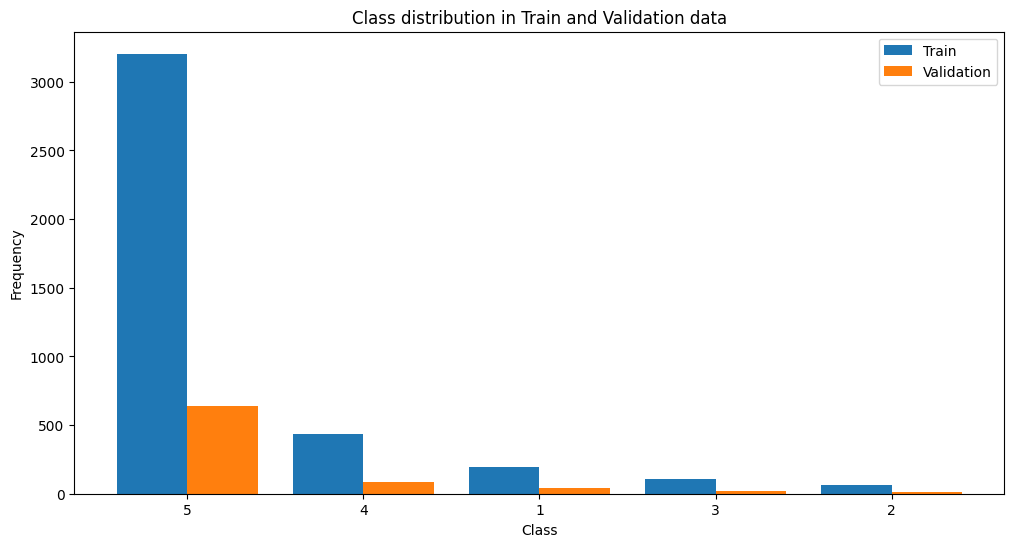

In [9]:
# For the Aug24-Assignmen1-Dataset1.xlsx

train_classes = train_df['label'].value_counts()
valid_classes = val_df['label'].value_counts()


# Create an index for each class
x = np.arange(len(train_classes))

# Define bar width. We'll need this to offset the second bar.
bar_width = 0.4

plt.figure(figsize=(12, 6))

# Note we add the `bar_width` parameter to the below method, so the validation bars align next to the training bars.
plt.bar(x, train_classes.values, width=bar_width, label='Train')
plt.bar(x + bar_width, valid_classes.values, width=bar_width, label='Validation')

# Fix the x-axes.
plt.xticks(x + bar_width / 2, train_classes.index)

plt.title('Class distribution in Train and Validation data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [10]:
print("Total lenght of the training data: ", len(train_df))
print("Training data class distribution")
print("train classes: ", train_classes)

print("Max text length in the training data: ", train_df['text_len'].max())
print("Min text length in the training data: ", train_df['text_len'].min())
print("Mean text length in the training data: ", train_df['text_len'].mean())

print("Total lenght of the validation data: ", len(val_df))
print("Validation data class distribution")
print("valid classes: ", valid_classes)


print("Max text length in the validation data: ", val_df['text_len'].max())
print("Min text length in the validation data: ", val_df['text_len'].min())
print("Mean text length in the validation data: ", val_df['text_len'].mean())

Total lenght of the training data:  3999
Training data class distribution
train classes:  label
5    3204
4     433
1     194
3     106
2      62
Name: count, dtype: int64
Max text length in the training data:  1037
Min text length in the training data:  0
Mean text length in the training data:  49.65716429107277
Total lenght of the validation data:  802
Validation data class distribution
valid classes:  label
5    641
4     87
1     39
3     22
2     13
Name: count, dtype: int64
Max text length in the validation data:  1444
Min text length in the validation data:  30
Mean text length in the validation data:  133.2431421446384


In [11]:
#percentage of each class in the training data
print("Percentage of each class in the training data")
print(train_classes/len(train_df))

#percentage of each class in the validation data
print("Percentage of each class in the validation data")
print(valid_classes/len(val_df))

Percentage of each class in the training data
label
5    0.801200
4    0.108277
1    0.048512
3    0.026507
2    0.015504
Name: count, dtype: float64
Percentage of each class in the validation data
label
5    0.799252
4    0.108479
1    0.048628
3    0.027431
2    0.016209
Name: count, dtype: float64


In [12]:
# for the sst2 dataset

train_classes = train_sst_df['label'].value_counts()
valid_classes = val_sst_df['label'].value_counts()
test_classes = test_sst_df['label'].value_counts()

print("Total lenght of the training data: ", len(train_sst_df))
print("Training data class distribution")
print("train classes: ", train_classes)

print("Maximum text length in the training data: ", train_sst_df['text_len'].max())
print("Minimum text length in the training data: ", train_sst_df['text_len'].min())
print("Mean text length in the training data: ", train_sst_df['text_len'].mean())
print("Median text length in the training data: ", train_sst_df['text_len'].median())

print("Total lenght of the validation data: ", len(val_sst_df))
print("Validation data class distribution")
print("valid classes: ", valid_classes)

print("Max text length in the validation data: ", val_sst_df['text_len'].max())
print("Min text length in the validation data: ", val_sst_df['text_len'].min())
print("Mean text length in the validation data: ", val_sst_df['text_len'].mean())
print("Median text length in the validation data: ", val_sst_df['text_len'].median())

print("Total lenght of the test data: ", len(test_sst_df))
print("Test data class distribution")
print("test classes: ", test_classes)

print("Max text length in the test data: ", test_sst_df['text_len'].max())
print("Min text length in the test data: ", test_sst_df['text_len'].min())
print("Mean text length in the test data: ", test_sst_df['text_len'].mean())
print("Median text length in the test data: ", test_sst_df['text_len'].median())

Total lenght of the training data:  67349
Training data class distribution
train classes:  label
1    37569
0    29780
Name: count, dtype: int64
Maximum text length in the training data:  52
Minimum text length in the training data:  1
Mean text length in the training data:  9.409553222765
Median text length in the training data:  7.0
Total lenght of the validation data:  872
Validation data class distribution
valid classes:  label
1    444
0    428
Name: count, dtype: int64
Max text length in the validation data:  47
Min text length in the validation data:  2
Mean text length in the validation data:  19.548165137614678
Median text length in the validation data:  19.0
Total lenght of the test data:  1820
Test data class distribution
test classes:  label
0    911
1    909
Name: count, dtype: int64
Max text length in the test data:  56
Min text length in the test data:  2
Mean text length in the test data:  19.248901098901097
Median text length in the test data:  18.0


In [13]:
#percentage of each class in the training data
print("Percentage of each class in the training data")
print(train_classes/len(train_sst_df))

#percentage of each class in the validation data
print("Percentage of each class in the validation data")
print(valid_classes/len(val_sst_df))

#percentage of each class in the test
print("Percentage of each class in the test data")
print(test_classes/len(test_sst_df))

Percentage of each class in the training data
label
1    0.557826
0    0.442174
Name: count, dtype: float64
Percentage of each class in the validation data
label
1    0.509174
0    0.490826
Name: count, dtype: float64
Percentage of each class in the test data
label
0    0.500549
1    0.499451
Name: count, dtype: float64
